<a href="https://colab.research.google.com/github/sherrywilly/CE880_Case_Study/blob/main/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_auc_score, roc_curve , auc,log_loss , f1_score , precision_score , recall_score
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

In [ ]:
# load the excel file and this file is stored in session storage
df = pd.read_excel("data_PostNatal.xlsx")
df.head() # first 5 elements in the dataframe

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes


In [ ]:
df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt', 'Feeling anxious'],
      dtype='object')

In [ ]:
df.info() # default info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad or Tearful                     1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping at night                  1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Feeling of guilt                           1494 non-null   object
 7   Problems of bonding with baby              1503 non-null   object
 8   Suicide attempt                            1503 non-null   object
 9   Feeling anxious                            1503 non-null   object
dtypes: object(10)
memory usage: 117.6+ K

In [ ]:
df.describe() # describe the data

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
count,1503,1503,1497,1503,1491,1503,1494,1503,1503,1503
unique,5,3,3,3,3,3,3,3,3,2
top,40-45,Yes,Yes,Two or more days a week,No,No,No,No,No,Yes
freq,364,536,555,640,583,841,624,557,709,980


In [ ]:
df.shape

(1503, 10)

In [ ]:
df.isnull().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Irritable towards baby & partner',
 'Problems concentrating or making decision',
 'Feeling of guilt']

**Observations**
- > some datas are missing in  Irritable towards baby & partner,Problems concentrating or making decision , Feeling of guilt



<Axes: >

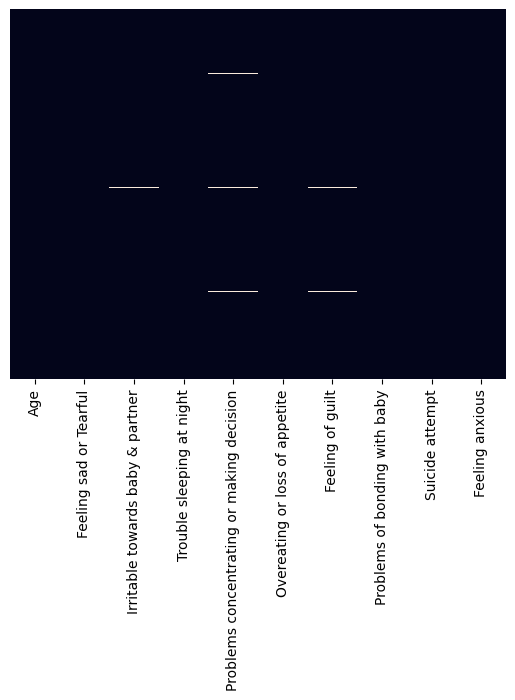

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
##To check Data Types
df.dtypes

Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
Feeling anxious                              object
dtype: object

In [ ]:
age_labels = df.query("`Feeling anxious`=='Yes'").Age.value_counts().index

In [ ]:
age_values = df.query("`Feeling anxious`=='Yes'").Age.value_counts().values

([<matplotlib.patches.Wedge at 0x20b9c30cbd0>,
 [Text(0.8119308952508195, 0.7421376026972377, '35-40'),
  Text(-0.6550921969496148, 0.8836595574630125, '40-45'),
  Text(-0.9601760729328171, -0.5367139917752409, '30-35'),
  Text(0.3028243603377923, -1.057495818803085, '45-50'),
  Text(1.0394309482627329, -0.3599768100775888, '25-30')],
 [Text(0.44287139740953785, 0.4048023287439478, '23.57%'),
  Text(-0.35732301651797166, 0.48199612225255223, '23.16%'),
  Text(-0.5237324034179002, -0.2927530864228587, '22.76%'),
  Text(0.16517692382061397, -0.576815901165319, '19.90%'),
  Text(0.566962335416036, -0.1963509873150484, '10.61%')])

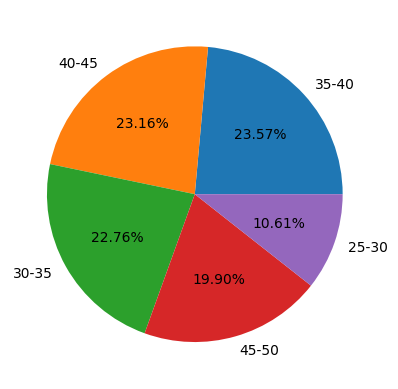

In [ ]:
plt.pie(age_values,labels=age_labels,autopct='%1.2f%%')

**Observations**
- > age group of 35-40 have most number of anxious people
- > age group of 25- 30 have least number of anxious people

In [ ]:
df.query("`Feeling anxious`=='Yes'").isnull().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64

In [ ]:
df.groupby(['Age','Feeling anxious']).size().reset_index()

,Age,Feeling anxious,0
0,25-30,No,77
1,25-30,Yes,104
2,30-35,No,115
3,30-35,Yes,223
4,35-40,No,118
5,35-40,Yes,231
6,40-45,No,137
7,40-45,Yes,227
8,45-50,No,76
9,45-50,Yes,195


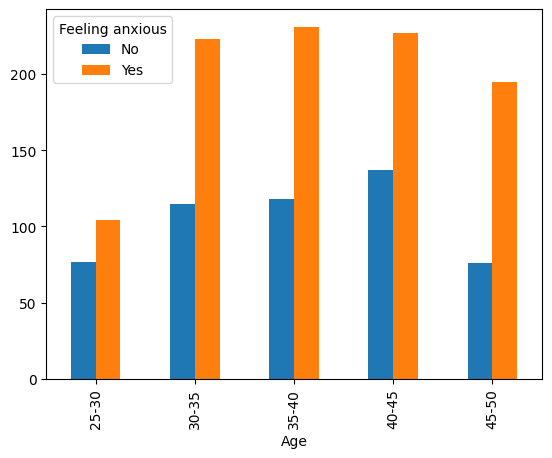

In [ ]:
crosstab_results = pd.crosstab(df['Age'], df['Feeling anxious'])
crosstab_results.plot(kind='bar')
plt.show()

In [ ]:
# for col in df.select_dtypes(include=['object'])[:7]:
#   print(f"Column: {col}")
#   df[col].value_counts().plot(kind='bar')
#   plt.show()
# crosstab_results.plot(kind='bar')

columns = df.select_dtypes(include=['object']).columns[:-1]


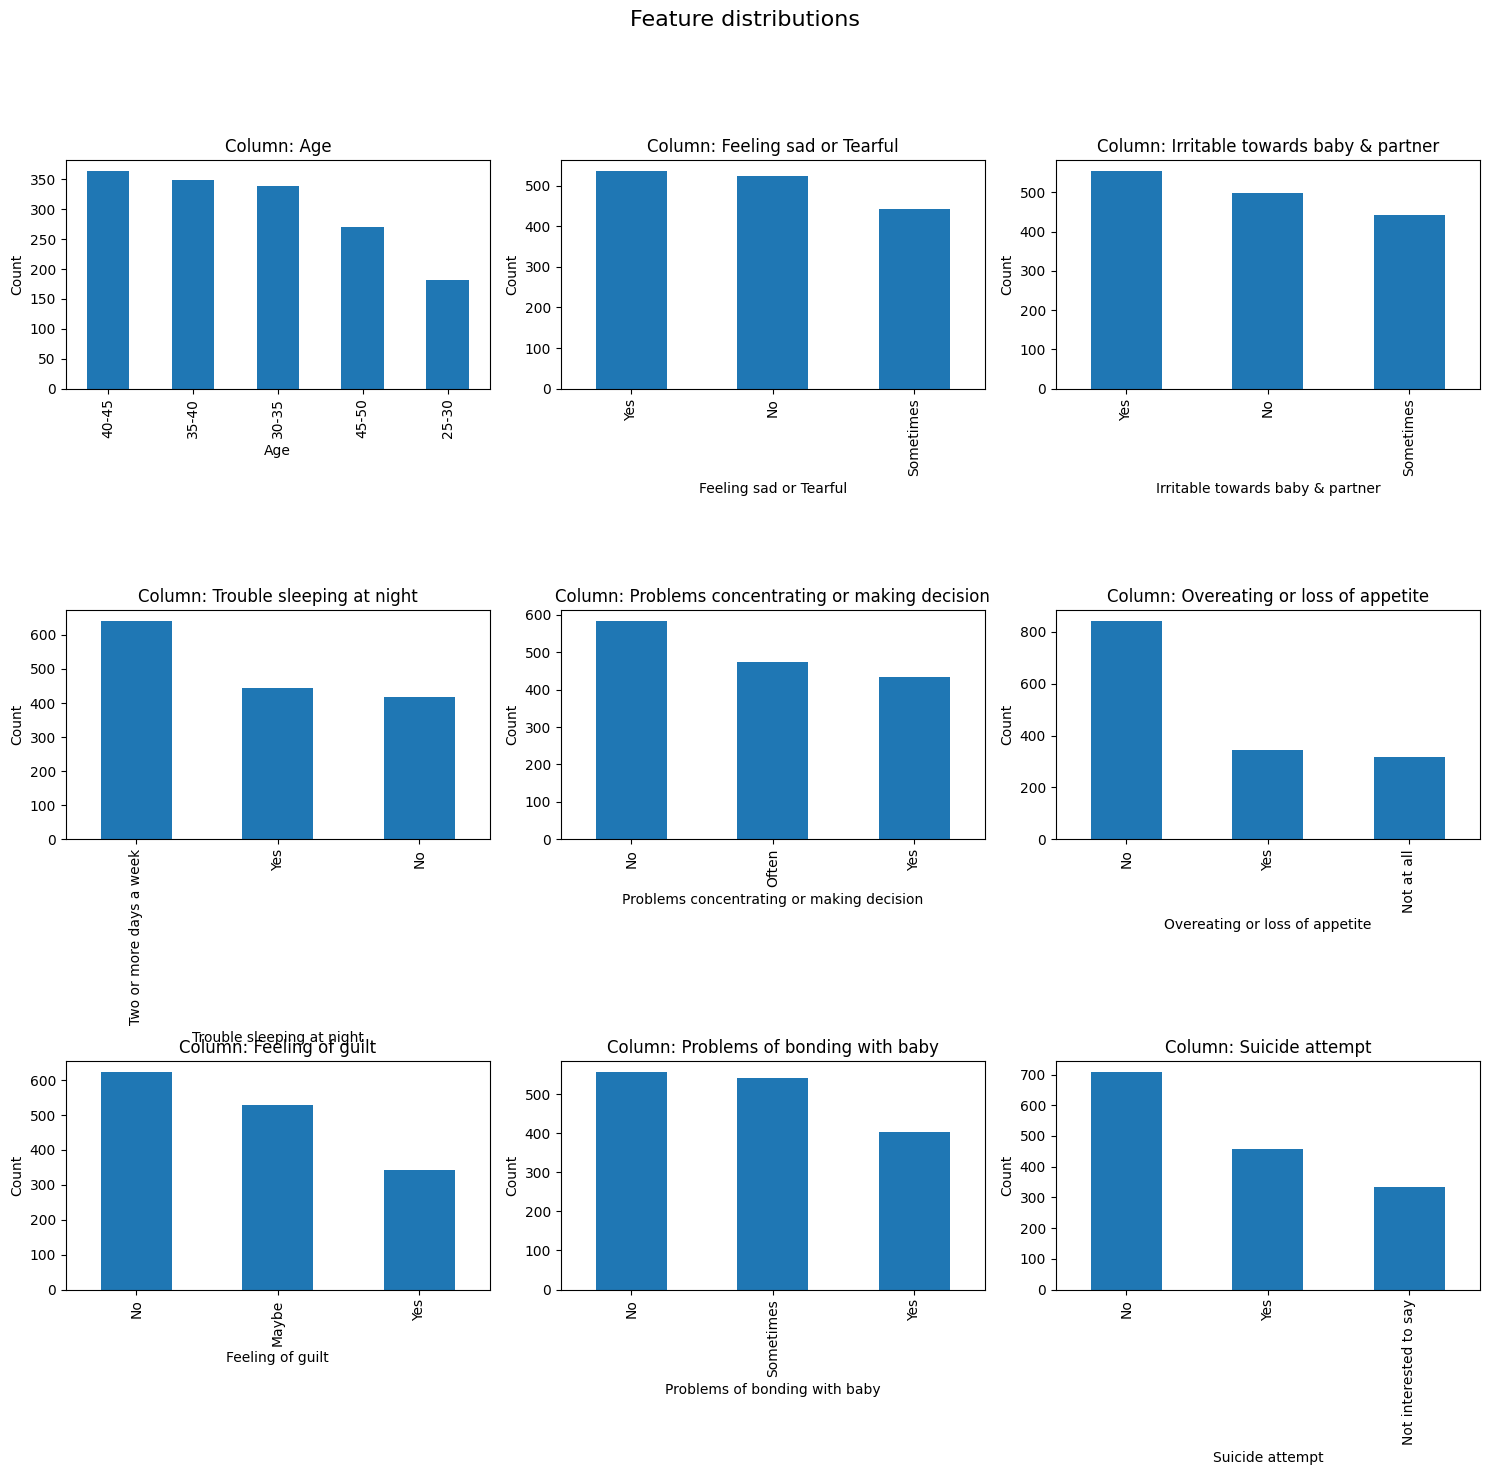

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3 * 5))
for index, column in enumerate(columns):
    row_idx,col_idx = index // 3,index % 3
    ax = axes[row_idx, col_idx]
    df[column].value_counts().plot(kind='bar',ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.set_title(f"Column: {column}")
fig.suptitle("Feature distributions", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

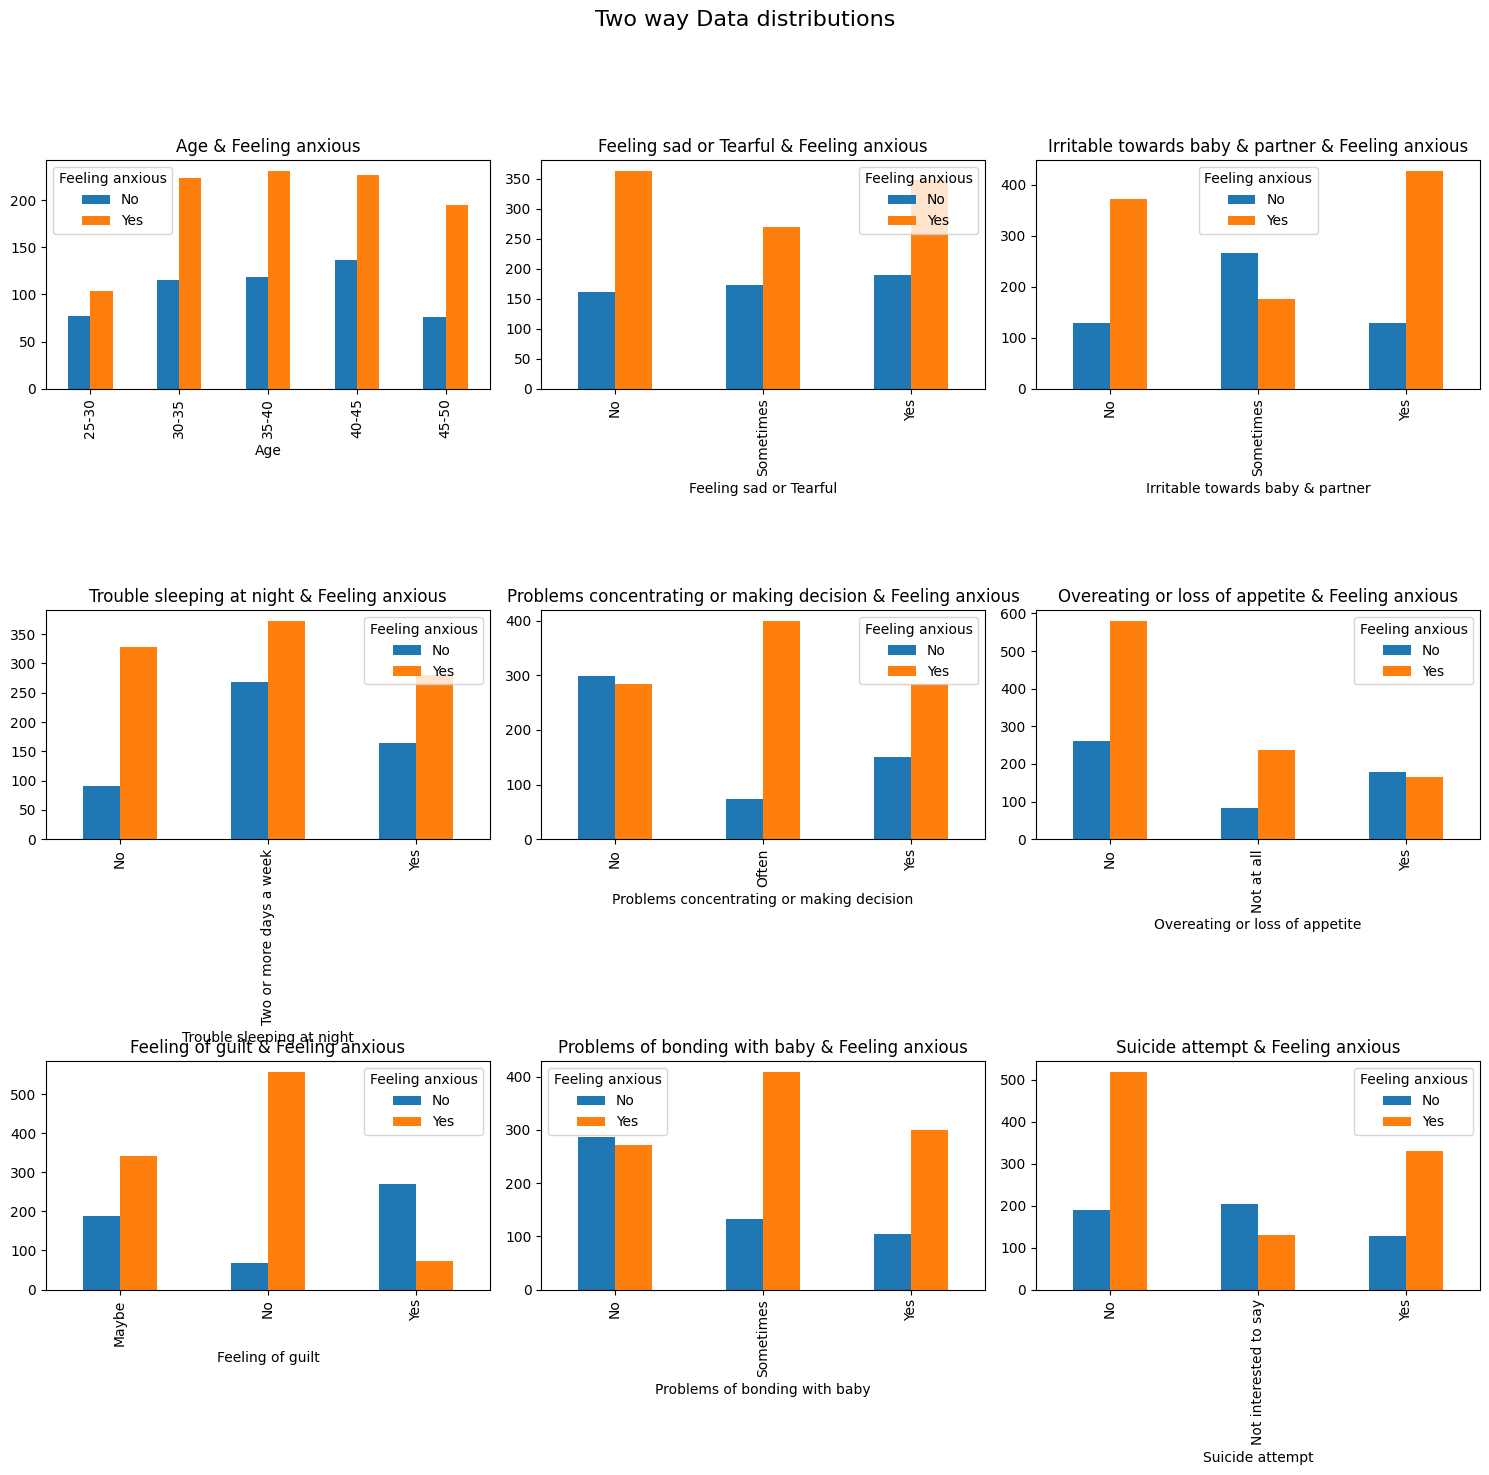

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3 * 5))
for index, column in enumerate(columns):
    row_idx,col_idx = index // 3,index % 3
    ax = axes[row_idx, col_idx]
    pd.crosstab(df[column], df['Feeling anxious']).plot(kind='bar',ax=ax)
    ax.set_title(f"{column} & Feeling anxious")
fig.suptitle("Two way Data distributions", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [ ]:
df[df.isnull().any(axis=1)]  # missing data rows

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
260,35-40,No,Yes,Yes,NaN,No,No,Yes,Yes,Yes
261,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,NaN,Yes,Yes,Yes
262,35-40,Yes,NaN,Yes,NaN,Yes,NaN,No,No,Yes
263,40-45,Yes,NaN,No,NaN,No,NaN,Sometimes,No,Yes
721,35-40,No,Yes,Yes,NaN,No,No,Yes,Yes,Yes
722,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,NaN,Yes,Yes,Yes
723,35-40,Yes,NaN,Yes,NaN,Yes,NaN,No,No,Yes
724,40-45,Yes,NaN,No,NaN,No,NaN,Sometimes,No,Yes
1146,35-40,No,Yes,Yes,NaN,No,No,Yes,Yes,Yes
1147,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,NaN,Yes,Yes,Yes


In [ ]:
cleaned_df = df.fillna(df.mode().iloc[0])
cleaned_df.isnull().sum()

Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
Feeling anxious                              0
dtype: int64

Filled null values with most frequent values
  - So There is no more null fields left

In [ ]:
df.duplicated().sum()

1177

In [ ]:
cleaned_df.duplicated().sum()

1177

**Observation**:
  - >its seems 1177 records are dulicated records in cleaned and un cleaned data

# Data Encoding

In [ ]:
pd.Series({col:df[col].unique() for col in df})

Age                                          [35-40, 40-45, 30-35, 45-50, 25-30]
Feeling sad or Tearful                                      [Yes, No, Sometimes]
Irritable towards baby & partner                       [Yes, No, Sometimes, nan]
Trouble sleeping at night                     [Two or more days a week, No, Yes]
Problems concentrating or making decision                  [Yes, No, Often, nan]
Overeating or loss of appetite                             [Yes, No, Not at all]
Feeling of guilt                                           [No, Yes, Maybe, nan]
Problems of bonding with baby                               [Yes, Sometimes, No]
Suicide attempt                                 [Yes, No, Not interested to say]
Feeling anxious                                                        [Yes, No]
dtype: object

In [ ]:
# custom encoding used for Age
cleaned_df["Age"] = cleaned_df["Age"].map({"25-30":1,"30-35":2,"35-40":3, "40-45":4, "45-50":5})

In [ ]:
label_encoder= preprocessing.LabelEncoder()


In [ ]:
# encoding all the columns using label_encoder except age and Feeling Anxious
columns_except_age_and_anxity = cleaned_df.iloc[:,1:-1].columns
for column in columns_except_age_and_anxity:
  cleaned_df[column] = label_encoder.fit_transform(cleaned_df[column])
cleaned_df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
0,3,2,2,1,2,2,1,2,2,Yes
1,4,2,0,0,2,2,2,2,0,No
2,3,2,0,2,2,2,1,1,0,Yes
3,3,2,2,2,2,0,0,0,0,Yes
4,4,2,0,1,2,0,1,2,0,Yes


In [ ]:
# custom encoding used for Feeling Anxious
cleaned_df['Feeling anxious'] = cleaned_df['Feeling anxious'].map({
    'Yes':1,'No':0
})
cleaned_df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
0,3,2,2,1,2,2,1,2,2,1
1,4,2,0,0,2,2,2,2,0,0
2,3,2,0,2,2,2,1,1,0,1
3,3,2,2,2,2,0,0,0,0,1
4,4,2,0,1,2,0,1,2,0,1


In [ ]:
cleaned_df.corr()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
Age,1.000000,-0.007180,0.028088,-0.078397,0.013200,-0.158305,-0.080359,-0.001325,-0.074603,0.056179
Feeling sad or Tearful,-0.007180,1.000000,-0.214887,-0.117364,0.043697,0.360815,-0.220073,0.166051,-0.225143,-0.039628
Irritable towards baby & partner,0.028088,-0.214887,1.000000,-0.042003,0.094303,-0.022597,0.053544,-0.075699,0.277915,0.035927
Trouble sleeping at night,-0.078397,-0.117364,-0.042003,1.000000,-0.119957,0.025543,0.111548,-0.149777,0.156737,-0.120967
Problems concentrating or making decision,0.013200,0.043697,0.094303,-0.119957,1.000000,0.019672,-0.036491,0.287869,0.089298,0.155384
Overeating or loss of appetite,-0.158305,0.360815,-0.022597,0.025543,0.019672,1.000000,0.145715,0.084874,-0.018513,-0.151471
Feeling of guilt,-0.080359,-0.220073,0.053544,0.111548,-0.036491,0.145715,1.000000,-0.165317,0.274441,-0.273008
Problems of bonding with baby,-0.001325,0.166051,-0.075699,-0.149777,0.287869,0.084874,-0.165317,1.000000,-0.037258,0.226769
Suicide attempt,-0.074603,-0.225143,0.277915,0.156737,0.089298,-0.018513,0.274441,-0.037258,1.000000,-0.040325
Feeling anxious,0.056179,-0.039628,0.035927,-0.120967,0.155384,-0.151471,-0.273008,0.226769,-0.040325,1.000000


In [ ]:
corr = cleaned_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
Age,1.000000,-0.007180,0.028088,-0.078397,0.013200,-0.158305,-0.080359,-0.001325,-0.074603,0.056179
Feeling sad or Tearful,-0.007180,1.000000,-0.214887,-0.117364,0.043697,0.360815,-0.220073,0.166051,-0.225143,-0.039628
Irritable towards baby & partner,0.028088,-0.214887,1.000000,-0.042003,0.094303,-0.022597,0.053544,-0.075699,0.277915,0.035927
Trouble sleeping at night,-0.078397,-0.117364,-0.042003,1.000000,-0.119957,0.025543,0.111548,-0.149777,0.156737,-0.120967
Problems concentrating or making decision,0.013200,0.043697,0.094303,-0.119957,1.000000,0.019672,-0.036491,0.287869,0.089298,0.155384
Overeating or loss of appetite,-0.158305,0.360815,-0.022597,0.025543,0.019672,1.000000,0.145715,0.084874,-0.018513,-0.151471
Feeling of guilt,-0.080359,-0.220073,0.053544,0.111548,-0.036491,0.145715,1.000000,-0.165317,0.274441,-0.273008
Problems of bonding with baby,-0.001325,0.166051,-0.075699,-0.149777,0.287869,0.084874,-0.165317,1.000000,-0.037258,0.226769
Suicide attempt,-0.074603,-0.225143,0.277915,0.156737,0.089298,-0.018513,0.274441,-0.037258,1.000000,-0.040325
Feeling anxious,0.056179,-0.039628,0.035927,-0.120967,0.155384,-0.151471,-0.273008,0.226769,-0.040325,1.000000


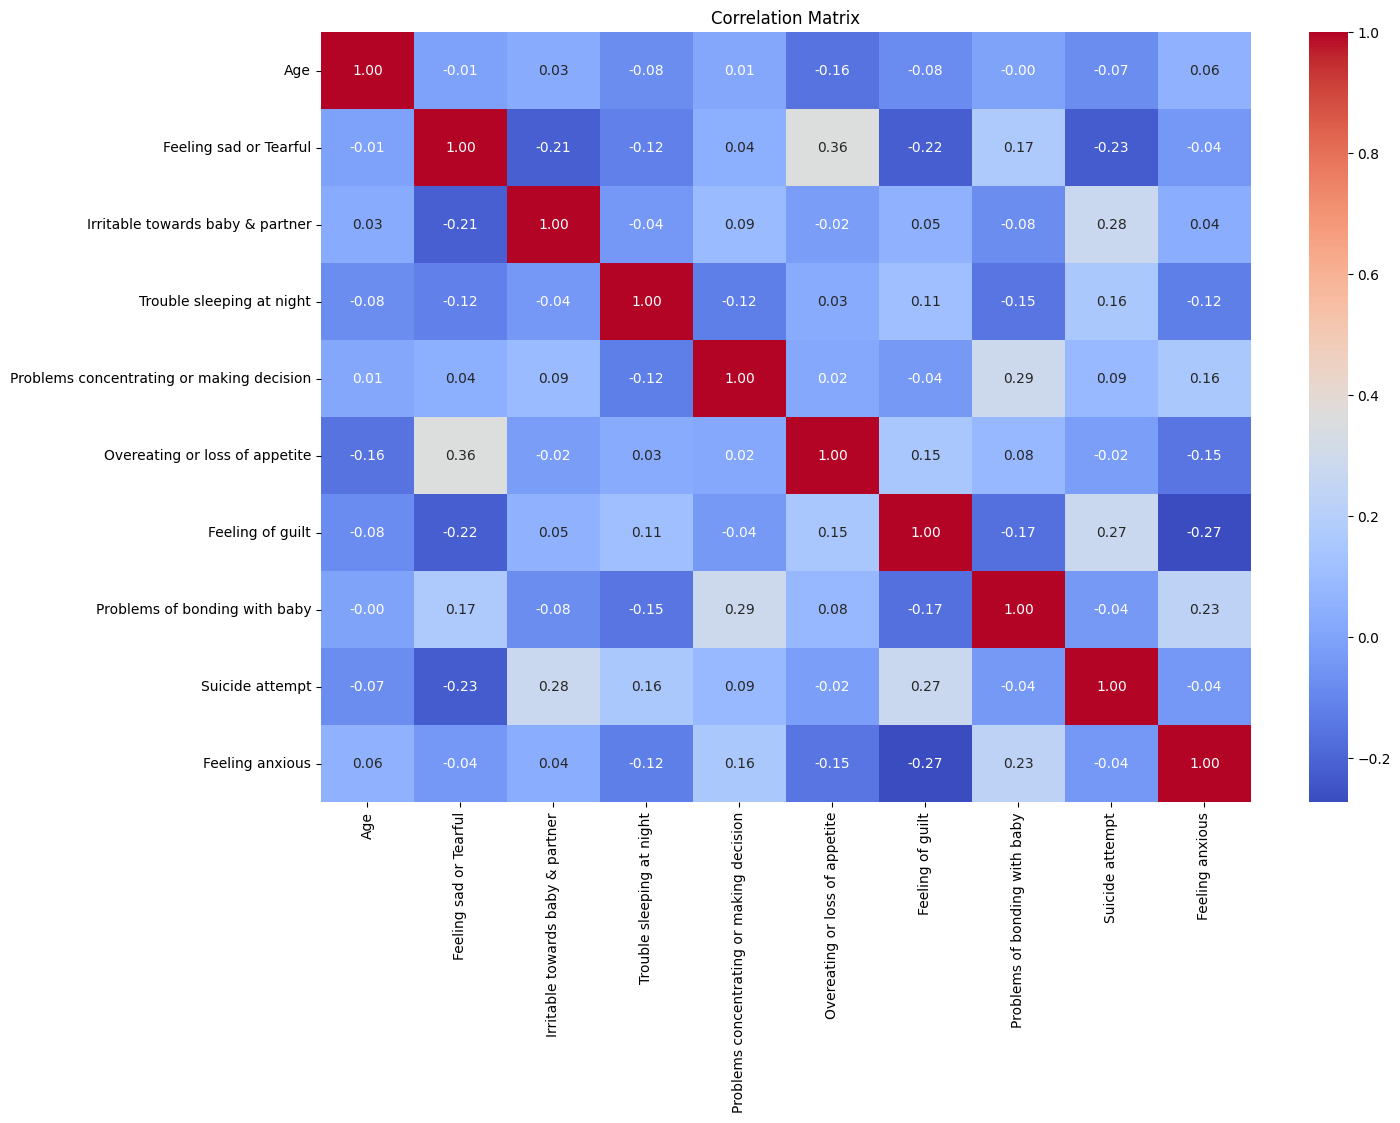

In [ ]:
# correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Dependent and Independent Variables
X = cleaned_df.iloc[:,:-1]
y = cleaned_df.iloc[:,-1]

In [ ]:
X.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,3,2,2,1,2,2,1,2,2
1,4,2,0,0,2,2,2,2,0
2,3,2,0,2,2,2,1,1,0
3,3,2,2,2,2,0,0,0,0
4,4,2,0,1,2,0,1,2,0


In [ ]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1498    1
1499    1
1500    0
1501    1
1502    0
Name: Feeling anxious, Length: 1503, dtype: int64

In [ ]:
#  Splitting the data into training and testing and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

# Model Initialization, Training and validation

In [ ]:
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(
       class_weight='balanced'
    ),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier()
}
model_data = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy_score_val = accuracy_score(y_val, y_pred)
    confusion_matrix_val = confusion_matrix(y_val, y_pred, labels=[0, 1])
    classification_report_val = classification_report(y_val, y_pred)
    f1_score_val = f1_score(y_val, y_pred)
    precision_score_val = precision_score(y_val, y_pred)
    recall_score_val = recall_score(y_val, y_pred)
    model_data[name] = {
        "accuracy": accuracy_score_val,
        "confusion_matrix": confusion_matrix_val,
        "classification_report": classification_report_val,
        "f1_score": f1_score_val,
        "precision_score": precision_score_val,
        "recall_score": recall_score_val,
        "roc_auc_score": roc_auc_score(y_val, y_pred),
        "log_loss": log_loss(y_val, y_pred)
    }
model_data_df = pd.DataFrame(model_data).T
model_data_df.head(10)

,accuracy,confusion_matrix,classification_report,f1_score,precision_score,recall_score,roc_auc_score,log_loss
SVM,0.910299,"[[87, 13], [14, 187]]",precision recall f1-score ...,0.932668,0.935,0.930348,0.900174,3.233152
Random Forest,0.983389,"[[98, 2], [3, 198]]",precision recall f1-score ...,0.987531,0.99,0.985075,0.982537,0.598732
KNN,0.877076,"[[79, 21], [16, 185]]",precision recall f1-score ...,0.909091,0.898058,0.920398,0.855199,4.430615
Gradient Boosting,0.933555,"[[88, 12], [8, 193]]",precision recall f1-score ...,0.950739,0.941463,0.960199,0.9201,2.394927
Bagging,0.963455,"[[98, 2], [9, 192]]",precision recall f1-score ...,0.972152,0.989691,0.955224,0.967612,1.31721


# Model Testing and Evaluation

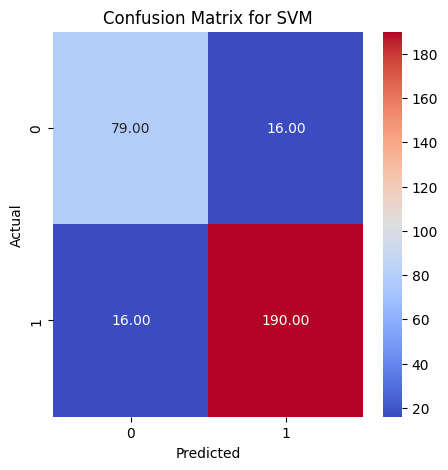

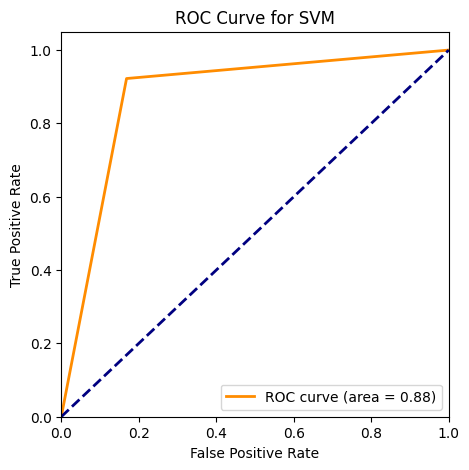

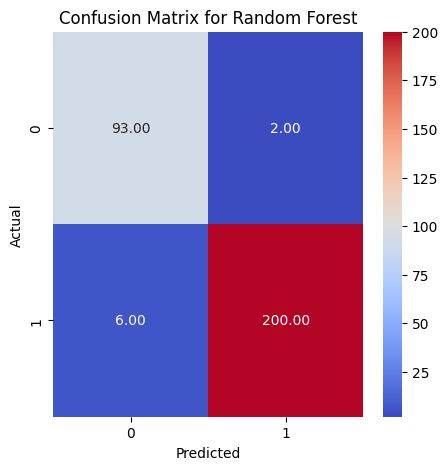

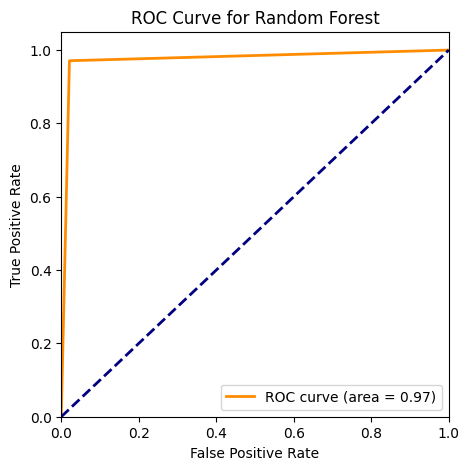

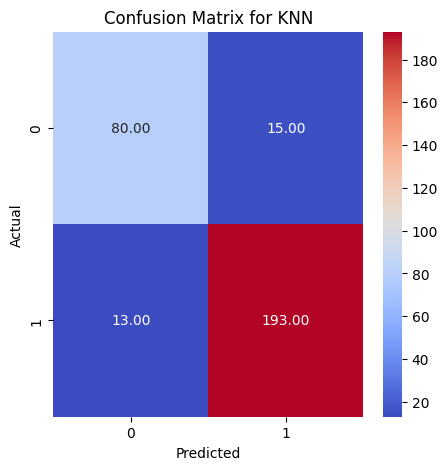

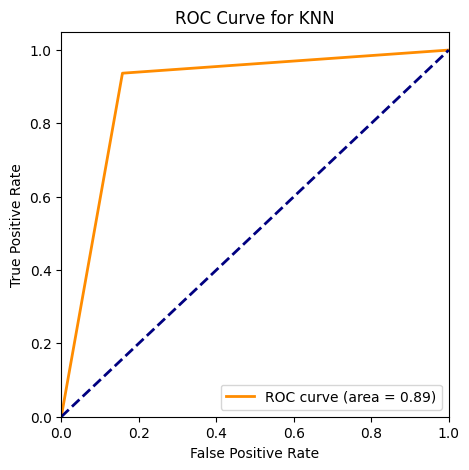

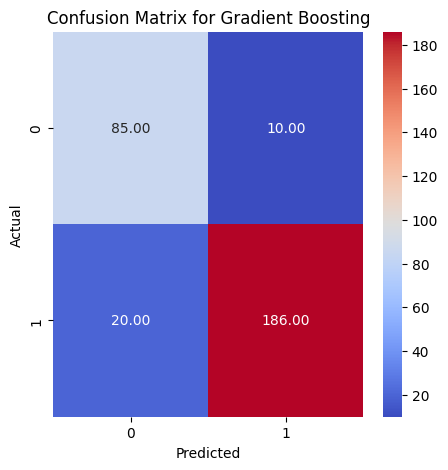

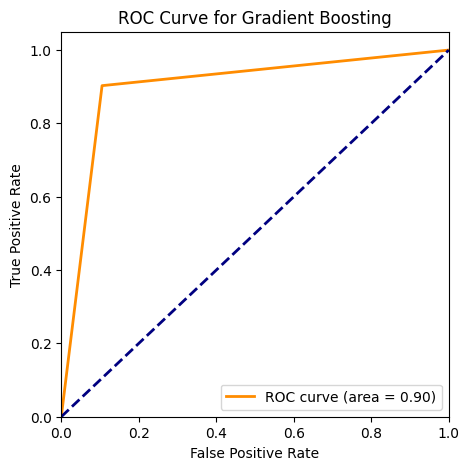

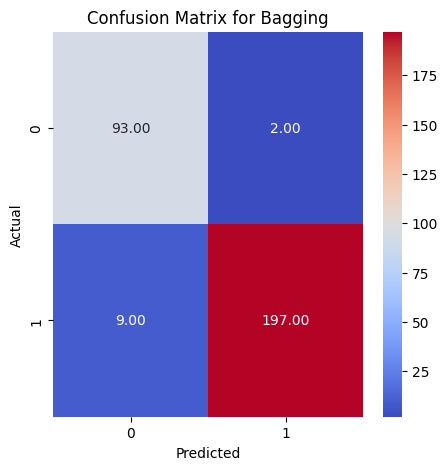

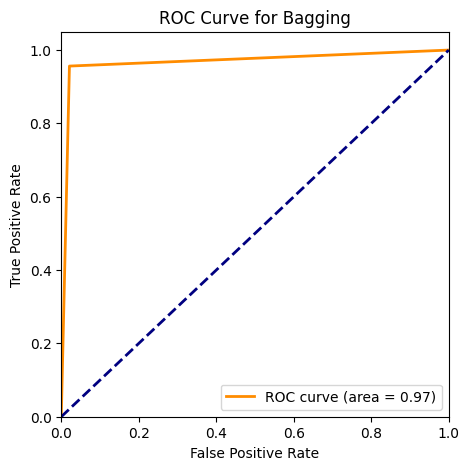

,accuracy,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score,log_loss
SVM,0.893688,"[[79, 16], [16, 190]]",0.92233,0.92233,0.92233,0.876955,3.831883
Random Forest,0.973422,"[[93, 2], [6, 200]]",0.980392,0.990099,0.970874,0.974911,0.957971
KNN,0.906977,"[[80, 15], [13, 193]]",0.932367,0.927885,0.936893,0.889499,3.352898
Gradient Boosting,0.900332,"[[85, 10], [20, 186]]",0.925373,0.94898,0.902913,0.898825,3.592391
Bagging,0.963455,"[[93, 2], [9, 197]]",0.97284,0.98995,0.956311,0.967629,1.31721


In [ ]:
model_data_test = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy_score_test = accuracy_score(y_test, y_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_pred, labels = [0, 1])
    classification_report_test = classification_report(y_test, y_pred)
    f1_score_test = f1_score(y_test, y_pred)
    precision_score_test = precision_score(y_test, y_pred)
    recall_score_test = recall_score(y_test, y_pred)
    log_loss_test = log_loss(y_test, y_pred)
    model_data_test[name] = {
        "accuracy": accuracy_score_test,
        "confusion_matrix": confusion_matrix_test,
        "f1_score": f1_score_test,
        "precision_score": precision_score_test,
        "recall_score": recall_score_test,
        "roc_auc_score": roc_auc_score(y_test, y_pred),
        "log_loss": log_loss_test

    }
    # display confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=[0,1], yticklabels=[0,1],)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    # display roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

model_data_test_df = pd.DataFrame(model_data_test).T
model_data_test_df.head(10)

# Model comparison

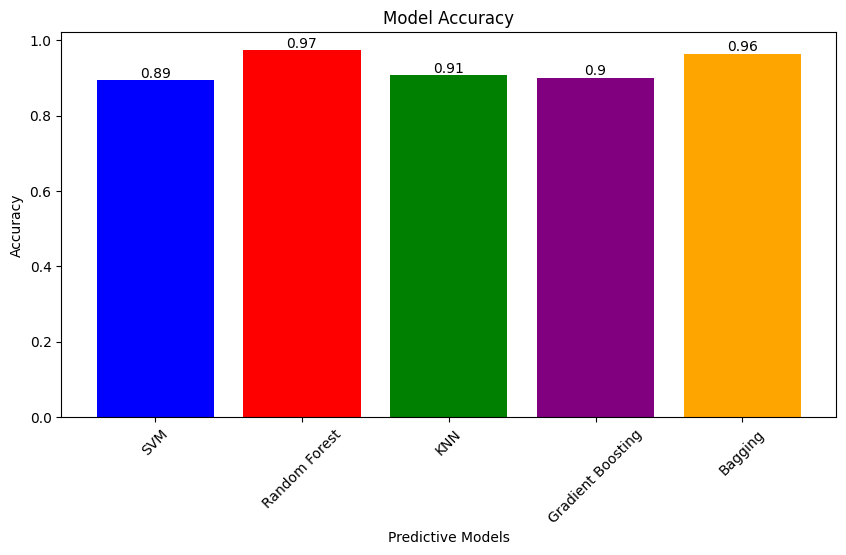

In [ ]:
plt.figure(figsize=(10,5))
colors = ['blue', 'red', 'green', 'purple', 'orange']
model_names = model_data_test_df.index
accuracy_scores = model_data_test_df['accuracy']
plt.bar(model_names, accuracy_scores, color=colors)
for index, value in enumerate(accuracy_scores):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Predictive Models")
plt.show()

In [ ]:
best_model = model_data_df[model_data_df["accuracy"] == model_data_df["accuracy"].max()]
best_model.head()
# best model is Random Forest with 0.97 % accuracy on testing data

,accuracy,confusion_matrix,classification_report,f1_score,precision_score,recall_score,roc_auc_score,log_loss
Random Forest,0.983389,"[[98, 2], [3, 198]]",precision recall f1-score ...,0.987531,0.99,0.985075,0.982537,0.598732
